# About calculation of Diffusion coefficient

The Diffusion coefficient was computed using molecular dynamics simulations through the mean squared displacement (MSD) of each atom
$$\langle r^2(t) \rangle = \frac{1}{N} \left\langle \sum_{l =1}^{N} \left|r_l(t) - r_l(0) \right|^2\right\rangle,$$

where $r_l(t)$ is the position vector of the $l^{th}$ particle at time $t$.

## MSD for Cu$_{50}$Zr$_{50}$

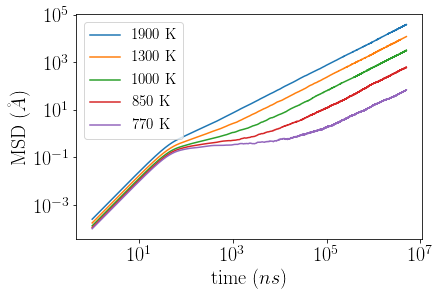

In [22]:
#**************************************************************************************************
#                        Importing libraries and font formating
#**************************************************************************************************
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family = 'Sans', serif = 'Computer Modern Roman', size = 18)
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
fig = plt.figure()
ax = fig.add_axes([0.18, 0.17, 0.8, 0.78])

#------------------------------------------Mean squared displacement-------------------------------
T = np.array([1900, 1300, 1000, 850, 770])
D = np.zeros(len(T))
i = 0
for n in T:
    time, msd = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZr50/Diffusion/msd_%i.dat' %(n), unpack=True,usecols=[0,1])
    d = 1/6.0 * np.diff(msd)/np.diff(time)  
    d *= 10**-5
    D[i] = np.mean(d)
    ax.plot(time,msd,label='%i K' %(n))
    i += 1
ax.set_facecolor('white')
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xlabel('time $(ns)$',fontsize=20)
plt.ylabel('MSD $(\AA)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc = 'best', fancybox = True, shadow = True)
ax.legend(loc=2,prop={'size':15})
fig.savefig("msd.pdf",facecolor='white', edgecolor='white')
plt.show()
fig.clf()

## Diffusion coefficient

For long times, the particles are in the diffusive regime, and the MSD is linearly dependent on time. Consequently, the self-diffusion can be calculated by the equation:
$$D = \lim_{t \rightarrow \infty} \frac{1}{6t}\langle \left|r_i(t) - r_i(0) \right|^2 \rangle. $$

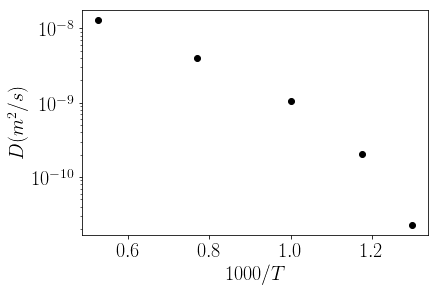

In [23]:
fig = plt.figure()
#fig.suptitle(r'\phantom{a} Driving force', size = 24)
ax = fig.add_axes([0.18, 0.17, 0.8, 0.78])
#ax.set_xlim(0.4, 1.5)
#ax.set_ylim(10.4, 11.6)
#ax.set_yticks(np.arange(10.4, 11.6, 0.2))
#ax.set_xticks(np.arange(0.4,1.5,0.2))
ax.plot(1000.0/T,D,'ko')
ax.set_facecolor('white')
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xlabel('$1000/T$',fontsize=20)
plt.ylabel('$D(m^2/s)$',fontsize=20)
ax.set_yscale('log')
#ax.set_xscale('log')
#plt.grid('on')
#ax.legend(loc = 'best', fancybox = True, shadow = True)
#ax.legend(loc=2,prop={'size':15})
#fig.savefig("Difusão.pdf",facecolor='white', edgecolor='white')
plt.show()
fig.clf()

The procedure can be repeated in order to obtain the self-diffusion coefficient for Cu, Zr, and Al for the three alloys. 
We write a LAMMPS script called NVT.lmp to calculation of MSD for Cu$_{50}$Zr$_{50}$, Cu$_{49}$Zr$_{49}$Al$_{2}$ and Cu$_{46}$Zr$_{46}$Al$_{8}$ the script used to calculate the diffusion coefficient is analogous at writen above. Notwithstanding, for the next plots we used the data saved for the diffusion coefficient at range of temperatures (1800 K-660 K) 


## Self diffusion coefficient for Cu$_{50}$Zr$_{50}$

In [24]:
#**************************************************************************************************************************************************
#                                                       Importing data for Cu50Zr50
#**************************************************************************************************************************************************
D_Zr = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZr50/Diffusion/Auto_diff/Diff_Zr.dat', unpack=True,usecols=[0])
D_Cu = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZr50/Diffusion/Auto_diff/Diff_Cu.dat', unpack=True,usecols=[0])
D = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZr50/Diffusion/Auto_diff/Diff.dat', unpack=True,usecols=[0])
T = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZr50/Diffusion/Auto_diff/temp.dat', unpack=True,usecols=[0])
Dr = 1.0/D

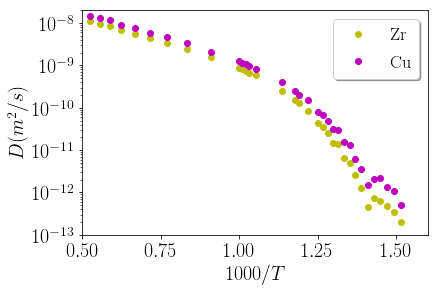

In [25]:
#**************************************************************************************************************************************************
#                                                         Self-difussion coeficcient
#**************************************************************************************************************************************************
fig = plt.figure()
#fig.suptitle(r'\phantom{a} Driving force', size = 24)
ax = fig.add_axes([0.18, 0.17, 0.8, 0.78])
ax.set_xlim(0.5, 1.6)
ax.set_ylim(1e-13, 2e-8)
#ax.set_yticks(np.arange(1e-13, 1e-7, 1e-1))
#ax.set_xticks(np.arange(0.4,1.5,0.2))
ax.plot(1000.0/T,D_Zr,'yo', label = 'Zr')
ax.plot(1000.0/T,D_Cu,'mo', label = 'Cu')
#ax.plot(T,D,'ko', label = 'All')
ax.set_facecolor('white')
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xlabel('$1000/T$',fontsize=20)
plt.ylabel('$D(m^2/s)$',fontsize=20)
ax.set_yscale('log')
#ax.set_xscale('log')
#plt.grid('on')
ax.legend(loc = 'best', fancybox = True, shadow = True)
#ax.legend(loc=3,prop={'size':15})
fig.savefig("Diff.pdf",facecolor='white', edgecolor='white')
plt.show()
fig.clf()

## Self diffusion coefficient for Cu$_{49}$Zr$_{49}$Al$_{2}$ and Cu$_{46}$Zr$_{46}$Al$_{8}$

In [29]:
#**************************************************************************************************************************************************
#                                                       Importing data for Cu49Zr49Al2
#**************************************************************************************************************************************************

T2 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl2/Difussion/Diif_plot/Temp.dat', usecols=[0], unpack=True)
D_Zr2 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl2/Difussion/Diif_plot/Diff_Zr.dat', usecols=[0], unpack=True)
D_Cu2 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl2/Difussion/Diif_plot/Diff_Cu.dat', usecols=[0], unpack=True)
D_Al2 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl2/Difussion/Diif_plot/Diff_Al.dat', usecols=[0], unpack=True)
D2 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl2/Difussion/Diif_plot/Diff.dat', usecols=[0], unpack=True)

#**************************************************************************************************************************************************
#                                                       Importing data for Cu46Zr46Al8
#**************************************************************************************************************************************************

T8 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl8/Difusão/Plot Diff/Temp.dat', usecols=[0], unpack=True)
D_Zr8 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl8/Difusão/Plot Diff/Diff_Zr.dat', usecols=[0], unpack=True)
D_Cu8 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl8/Difusão/Plot Diff/Diff_Cu.dat', usecols=[0], unpack=True)
D_Al8 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl8/Difusão/Plot Diff/Diff_Al.dat', usecols=[0], unpack=True)
D8 = np.loadtxt('/home/rene/Documentos/trabajo de grado/Fragile-strong/CuZrAl8/Difusão/Plot Diff/Diff.dat', usecols=[0], unpack=True)


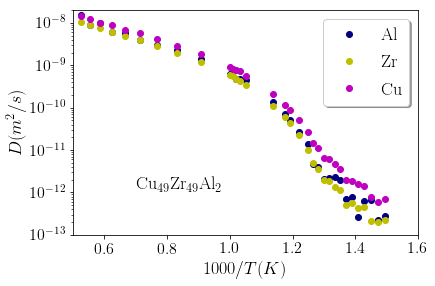

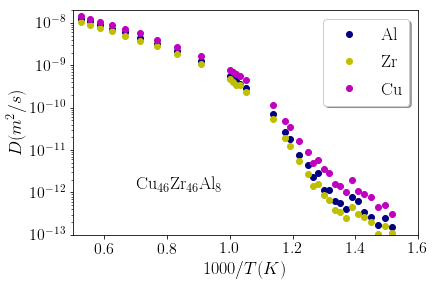

In [39]:

#**************************************************************************************************************************************************
#                                                         Self-difussion coeficcient  Cu49Zr49Al2
#**************************************************************************************************************************************************

fig = plt.figure()
ax = fig.add_axes([0.18, 0.17, 0.8, 0.78])
ax.set_xlim(0.5, 1.6)
ax.set_ylim(1e-13, 2e-8)
ax.plot(1000.0/T2,D_Al2, color = 'navy',marker='o',linestyle='None',label='Al')
ax.plot(1000.0/T2,D_Zr2,color = 'y',marker='o',linestyle='None',label='Zr')
ax.plot(1000.0/T2,D_Cu2,color = 'm',marker='o',linestyle='None',label='Cu')
ax.text(0.7, 1e-12, "Cu$_{49}$Zr$_{49}$Al$_{2}$")
ax.set_yscale('log')
ax.set_xlabel('$1000/T(K)$')
ax.set_ylabel('$D(m^2/s)$')
ax.set_facecolor('white')
ax.legend(loc = 'best', fancybox = True, shadow = True)
plt.show()
fig.clf()

#**************************************************************************************************************************************************

#                                                         Self-difussion coeficcient  Cu49Zr49Al2
#**************************************************************************************************************************************************

fig = plt.figure()
ax = fig.add_axes([0.18, 0.17, 0.8, 0.78])
ax.set_xlim(0.5, 1.6)
ax.set_ylim(1e-13, 2e-8)
ax.plot(1000.0/T8,D_Al8, color = 'navy',marker='o',linestyle='None',label='Al')
ax.plot(1000.0/T8,D_Zr8,color = 'y',marker='o',linestyle='None',label='Zr')
ax.plot(1000.0/T8,D_Cu8,color = 'm',marker='o',linestyle='None',label='Cu')
ax.text(0.7, 1e-12, "Cu$_{46}$Zr$_{46}$Al$_{8}$")
ax.set_yscale('log')
ax.set_xlabel('$1000/T(K)$')
ax.set_ylabel('$D(m^2/s)$')
ax.set_facecolor('white')
ax.legend(loc = 'best', fancybox = True, shadow = True)
plt.show()
fig.clf()


In [18]:
import numpy as np
T0 = 1800
Nsim = 10**4
lamb = np.zeros(Nsim)
time = np.arange(0,Nsim)
for t in range(Nsim):
    lamb[t] = T0/(T0 + 100*t)
T = T0/lamb

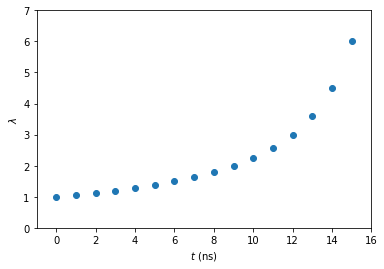

In [32]:
import numpy as np
import pylab as plt
T0 = 1800.
Nsim = 16*10**6
time = np.arange(0,Nsim,1e6)
lamb = np.zeros(len(time))
for t in range(len(time)):
	lamb[t] = T0/(T0 - 10**-4 * time[t])
T = T0/lamb
time = time/10**6
plt.plot(time,lamb,"o")
plt.xlabel("$t$ (ns)")
plt.ylabel("$\\lambda$")
plt.axis([-1, 16, 0, 7])
plt.axis()
plt.show()

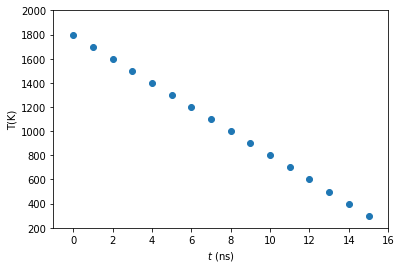

In [34]:
plt.plot(time,T,"o")
plt.xlabel("$t$ (ns)")
plt.ylabel("T(K)")
plt.axis([-1, 16, 200, 2000])
plt.show()